In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('star_classification.csv')

In [59]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [61]:
df = df.drop(columns=['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'])

In [62]:
df.head()

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


<AxesSubplot:xlabel='class', ylabel='count'>

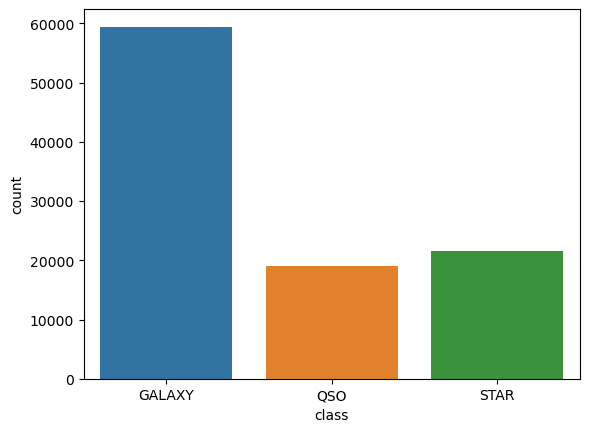

In [63]:
sns.countplot(data=df, x='class')

<AxesSubplot:xlabel='class', ylabel='redshift'>

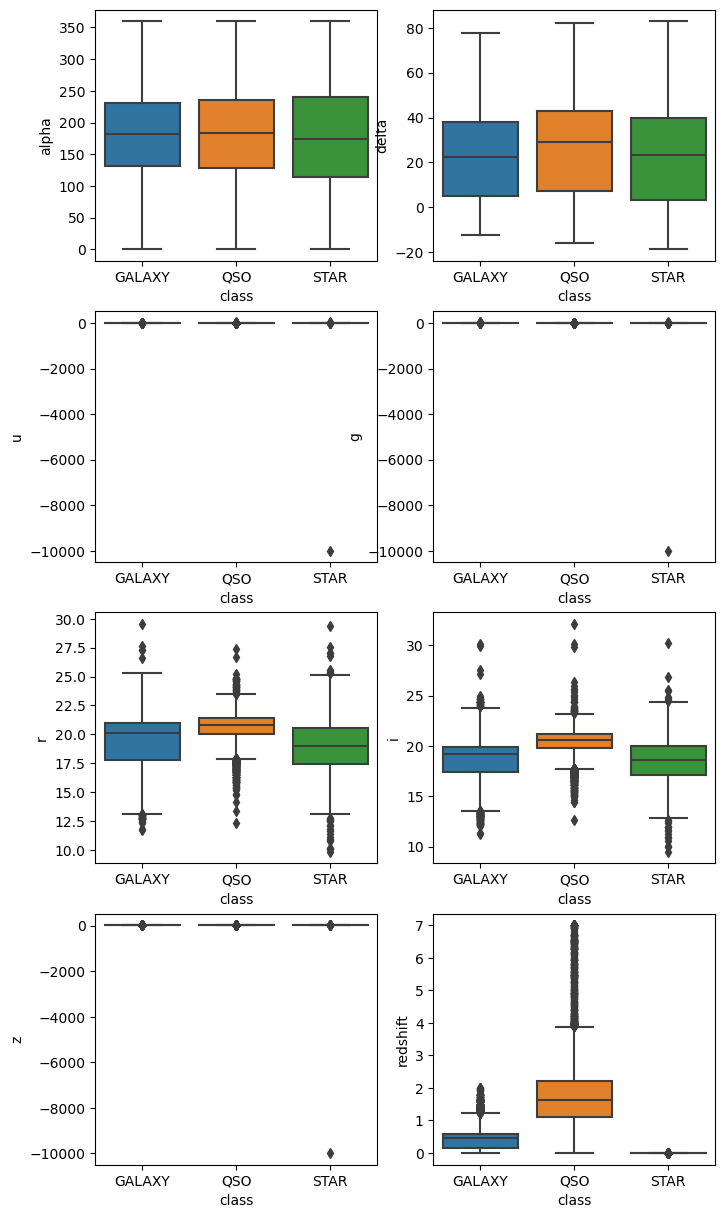

In [65]:
fig, axes = plt.subplots(4, 2, figsize=(8, 15))

sns.boxplot(data=df, x='class', y='alpha', ax=axes[0][0])
sns.boxplot(data=df, x='class', y='delta', ax=axes[0][1])
sns.boxplot(data=df, x='class', y='u', ax=axes[1][0])
sns.boxplot(data=df, x='class', y='g', ax=axes[1][1])
sns.boxplot(data=df, x='class', y='r', ax=axes[2][0])
sns.boxplot(data=df, x='class', y='i', ax=axes[2][1])
sns.boxplot(data=df, x='class', y='z', ax=axes[3][0])
sns.boxplot(data=df, x='class', y='redshift', ax=axes[3][1])

In [69]:
df = df[df.u > -9000]
df = df[df.g > -9000]
df = df[df.z > -9000]

<AxesSubplot:xlabel='class', ylabel='redshift'>

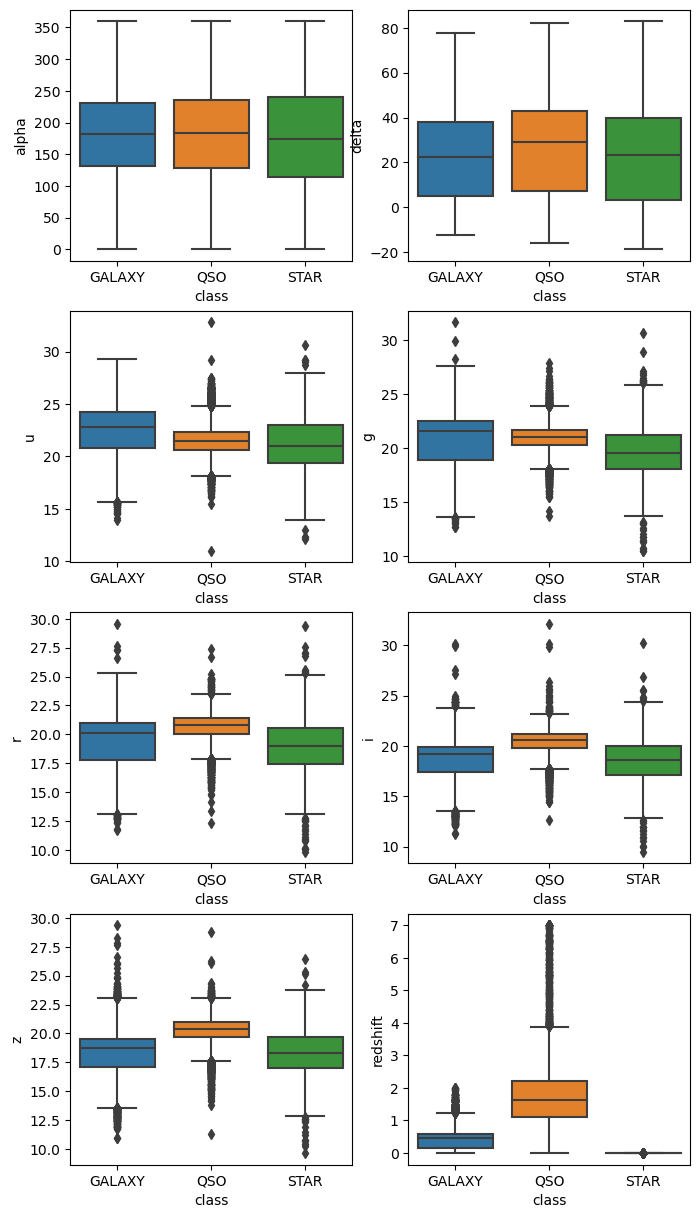

In [70]:
fig, axes = plt.subplots(4, 2, figsize=(8, 15))

sns.boxplot(data=df, x='class', y='alpha', ax=axes[0][0])
sns.boxplot(data=df, x='class', y='delta', ax=axes[0][1])
sns.boxplot(data=df, x='class', y='u', ax=axes[1][0])
sns.boxplot(data=df, x='class', y='g', ax=axes[1][1])
sns.boxplot(data=df, x='class', y='r', ax=axes[2][0])
sns.boxplot(data=df, x='class', y='i', ax=axes[2][1])
sns.boxplot(data=df, x='class', y='z', ax=axes[3][0])
sns.boxplot(data=df, x='class', y='redshift', ax=axes[3][1])

<AxesSubplot:xlabel='redshift', ylabel='Density'>

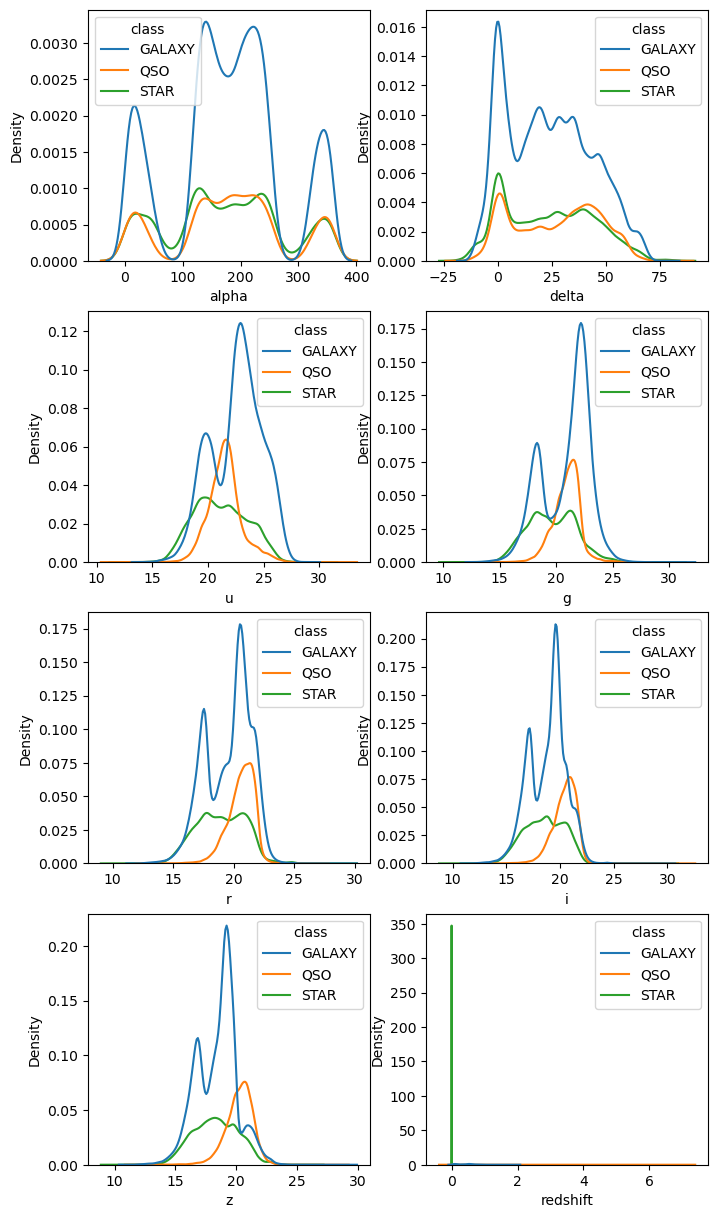

In [76]:
fig, axes = plt.subplots(4, 2, figsize=(8, 15))

sns.kdeplot(data=df, x="alpha", hue='class', ax=axes[0][0])
sns.kdeplot(data=df, x="delta", hue='class', ax=axes[0][1])
sns.kdeplot(data=df, x="u", hue='class', ax=axes[1][0])
sns.kdeplot(data=df, x="g", hue='class', ax=axes[1][1])
sns.kdeplot(data=df, x="r", hue='class', ax=axes[2][0])
sns.kdeplot(data=df, x="i", hue='class', ax=axes[2][1])
sns.kdeplot(data=df, x="z", hue='class', ax=axes[3][0])
sns.kdeplot(data=df, x="redshift", hue='class', ax=axes[3][1])